### Network Analysis

In [1]:
import networkx as nx
from networkx.algorithms import bipartite
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

## Graphs
In this demo we will build a graph from the Apollo 15 landing site control network

In [2]:
data_file="apollo.csv"

First we need to import the csv as before

In [3]:
df = pd.read_csv(data_file)

### Graph Generation
Now we will create a NetworkX bipartite graph from the Panda's data frame.
Using our data frame we can decide how we want to associate the data from our csv with the different parts of the graph

In [4]:
pd.set_option('display.max_columns',200)
df.head(3)

,ControlPointId,PointType,ChooserName,DateTime,EditLock,Ignored,AprioriSurfacePointSource,AprioriSurfacePointSourceFile,AprioriRadiusSource,AprioriRadiusSourceFile,AprioriX,AprioriY,AprioriZ,AprioriXSigma,AprioriYSigma,AprioriZSigma,AprioriLatitude,AprioriLongitude,AprioriLocalRadius,AprioriLatitudeSigma,AprioriLongitudeSigma,AprioriLocalRadiusSigma,AprioriLatitudeSigmaDistance,AprioriLongitudeSigmaDistance,AdjustedX,AdjustedY,AdjustedZ,AdjustedXSigma,AdjustedYSigma,AdjustedZSigma,AdjustedLatitude,AdjustedLongitude,AdjustedLocalRadius,AdjustedLatitudeSigma,AdjustedLongitudeSigma,AdjustedLocalRadiusSigma,AdjustedLatitudeSigmaDistance,AdjustedLongitudeSigmaDistance,MinimumResidual,MaximumResidual,AverageResidual,MinimumSampleResidual,MaximumSamlpeResidual,MinimumLineResidual,MaximumLineResidual,MaximumSampleShift,MinimumSampleShift,AverageSampleShift,MaximumLineShift,MinimumLineShift,AverageLineShift,MaximumPixelShift,MinimumPixelShift,AveragePixelShift,MinimumPixelZScore,AveragePixelZScore,MaximumGoodnessOfFit,MinimumGoodnessOfFit,AverageGoodnessOfFit,AprioriLine,AprioriSample,ChooserName.1,CubeSerialNumber,DateTime.1,Line,LineResidual,LineSigma,Sample,SampleResidual,SampleSigma,ResidualMagnitude,MeasureType,Filename,Sample.1,Line.1,PixelValue,RightAscension,Declination,PlanetocentricLatitude,PlanetographicLatitude,PositiveEast360Longitude,PositiveEast180Longitude,PositiveWest360Longitude,PositiveWest180Longitude,BodyFixedCoordinateX,BodyFixedCoordinateY,BodyFixedCoordinateZ,LocalRadius,SampleResolution,LineResolution,SpacecraftPositionX,SpacecraftPositionY,SpacecraftPositionZ,SpacecraftAzimuth,SlantDistance,TargetCenterDistance,SubSpacecraftLatitude,SubSpacecraftLongitude,SpacecraftAltitude,OffNadirAngle,SubSpacecraftGroundAzimuth,SunPositionX,SunPositionY,SunPositionZ,SubSolarAzimuth,SolarDistance,SubSolarLatitude,SubSolarLongitude,SubSolarGroundAzimuth,Phase,Incidence,Emission,NorthAzimuth,EphemerisTime,UTC,LocalSolarTime,SolarLongitude,LookDirectionBodyFixedX,LookDirectionBodyFixedY,LookDirectionBodyFixedZ,LookDirectionJ2000X,LookDirectionJ2000Y,LookDirectionJ2000Z,LookDirectionCameraX,LookDirectionCameraY,LookDirectionCameraZ,ObliqueDetectorResolution,ObliquePixelResolution,ObliqueLineResolution,ObliqueSampleResolution
0,SG0001747,Free,seedgrid,2017-05-15T09:29:55,0,0,AverageOfMeasures,NaN,AverageOfMeasures,NaN,1539.998109,49.980759,798.721357,0.002003,0.002937,0.003872,27.401227,1.858886,1735.525298,0.000144,0.000109,0.000006,0.004368,0.003723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.232364,1.300336,0.766350,-1.296299,0.210965,-0.102383,0.097402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.164302,-4.903468,0.780150,0.735902,0.758026,NaN,NaN,jigsaw,APOLLO15/METRIC/1971-07-31T14:01:40.346,2015-10-14T16:22:26,1178.050,0.097402,NaN,276.863,0.210965,NaN,0.232364,RegisteredSubPixel,/work/projects/IPCE/IpceData/Apollo15/AS15-M-0...,276.862901,1178.047966,21568.002,270.524771,-22.470969,27.370230,27.370230,1.920663,1.920663,358.079337,-1.920663,1540.258806,51.651735,797.827519,1.735394e+06,9.046942,9.046942,1653.216689,130.247163,798.178842,33.570752,137.611221,1840.429083,25.702075,4.504691,101.761268,38.842188,125.230558,4.614361e+07,1.447657e+08,609774.910316,6.515734,1.015673,0.229939,72.320480,99.086030,37.490939,72.558365,41.692864,269.690918,-8.969111e+08,1971-07-31T14:01:40.3459999,7.306679,171.716895,-0.820848,-0.571141,-0.002553,0.008463,-0.924035,-0.382215,0.527973,-0.343891,-0.776520,12.115558,12.115558,12.115558,12.115558
1,SG0001747,Free,seedgrid,2017-05-15T09:29:55,0,0,AverageOfMeasures,NaN,AverageOfMeasures,NaN,1539.998109,49.980759,798.721357,0.002003,0.002937,0.003872,27.401227,1.858886,1735.525298,0.000144,0.000109,0.000006,0.004368,0.003723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.232364,1.300336,0.766350,-1.296299,0.210965,-0.102383,0.097402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.164302,-4.903468,0.780150,0.735902,0.758026,NaN,NaN,jigsaw,APOLLO15/METRIC/1971-07-31T14:02:03.751,2015-1

Based on looking at out data we want to make control points and images nodes and control measures nodes.

On control point nodes we'll add the ground point and the point type.

On image nodes we'll add the cube serial number.

On control measure edges we'll add the measure location, the measure residual, and the computed photometric angles.

In [5]:
B = nx.Graph()
for index, row in df.iterrows():
    B.add_node(row['ControlPointId'],
               bipartite=0,
               point_type=row['PointType'],
               lat=row['AprioriLatitude'],
               lon=row['AprioriLongitude'],
               rad=row['AprioriLocalRadius'])
    B.add_node(row['CubeSerialNumber'],
               bipartite=1)
    B.add_edge(row['ControlPointId'],
               row['CubeSerialNumber'],
               measure_type=row['MeasureType'],
               sample=row['Sample'],
               line=row['Line'],
               sample_residual=row['SampleResidual'],
               line_residual=row['LineResidual'],
               phase=row['Phase'],
               incidence=row['Incidence'],
               emission=row['Emission'],
               image=row['CubeSerialNumber'])

In [6]:
points = {n for n, d in B.nodes(data=True) if d['bipartite']==0}
images = {n for n, d in B.nodes(data=True) if d['bipartite']==1}

From the control network we know there are 4 images, 440 control points, and 1119 control measures so we can dynamically check that we have all of those.

In [7]:
print('Images: {}\nPoints: {}\nMeasures: {}'.format(len(images), len(points),len(B.edges())))

Images: 4
Points: 440
Measures: 1119


### Drawing Graphs
Now that we have our graph let's look at it

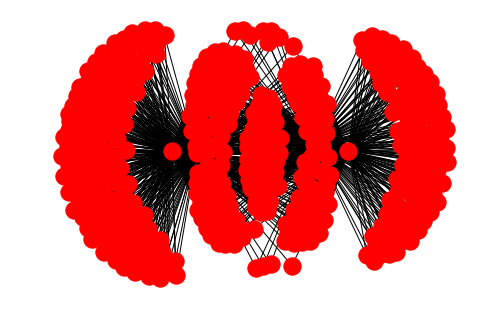

In [8]:
nx.draw(B)
plt.show()

That's super ugly so let's try drawing it another way

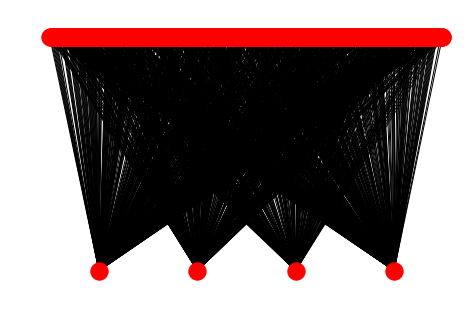

In [9]:
pos = dict()
ratio = len(points)/len(images)
pos.update( (n, ((i+0.5)*ratio, 0)) for i, n in enumerate(images) )
pos.update( (n, (i, 0.5)) for i, n in enumerate(points) )
nx.draw(B, pos=pos)
plt.show()

In [10]:
images

{'APOLLO15/METRIC/1971-07-31T14:00:53.547',
 'APOLLO15/METRIC/1971-07-31T14:01:16.947',
 'APOLLO15/METRIC/1971-07-31T14:01:40.346',
 'APOLLO15/METRIC/1971-07-31T14:02:03.751'}

Now we can see the images are separate from the control points but that still looks terrible!

Let's try some more drawing options

In [11]:
def average_color(colors):
    average = [sum(color) / len(color) for color in zip(*colors)]
    return tuple(average)

In [12]:
cmap = matplotlib.cm.get_cmap('Greens')
node_cmap = matplotlib.cm.get_cmap('Reds')

num_images = len(images)
image_colors = dict()
image_colors.update( (image, cmap((i+1)/(num_images+1))) for i, image in enumerate(images) )
image_node_colors = dict()
image_node_colors.update( (image, node_cmap((i+1)/(num_images+1))) for i, image in enumerate(images) )

edge_colors = [image_colors[image] for _, _, image in B.edges.data('image')]

node_colors = [image_node_colors[node] if node in images else average_color([image_colors[image] for image in B.neighbors(node)]) for node in B.nodes]

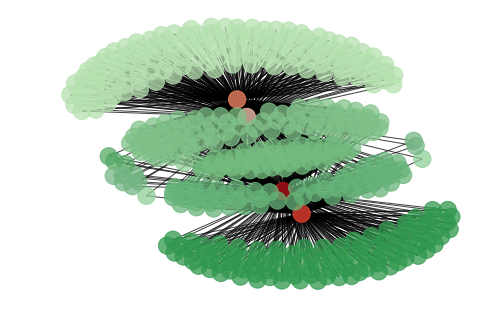

In [13]:
nx.draw(B,
        #edge_color=edge_colors,
        node_color=node_colors,
        alpha=0.75)
plt.show()

That's better but still not great. Let's try plotting the image and points separately

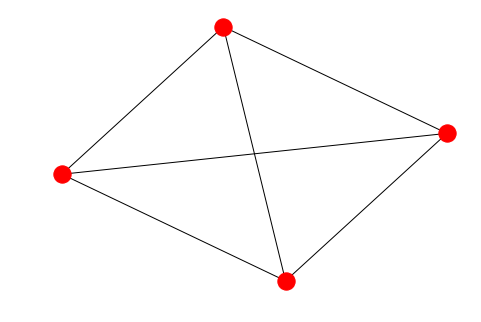

In [14]:
image_graph = bipartite.projected_graph(B, images)
nx.draw(image_graph)
plt.show()

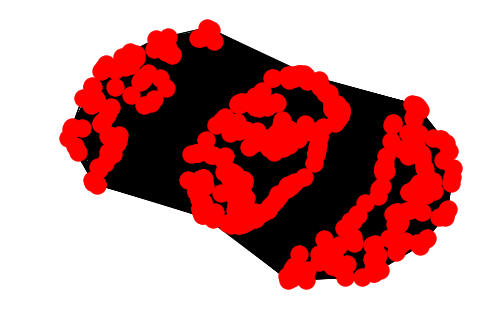

In [15]:
point_graph = bipartite.projected_graph(B, points)
nx.draw(point_graph)
plt.show()

Let's try making the points graph look a bit nicer

In [21]:
point_node_colors = [cmap(B.degree(node)/4) for node in point_graph.nodes]

point_pos = dict()
point_pos.update((node ,(point_graph.node[node]['lat'], point_graph.node[node]['lon'])) for node in point_graph.nodes)

SyntaxError: invalid syntax (<ipython-input-21-2b6ba3b28cc5>, line 4)

NetworkXError: Node 'R16HP00442' has no position.

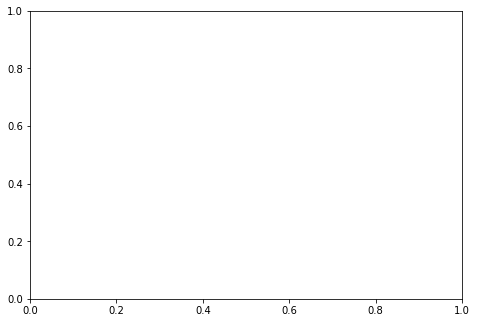

In [20]:
nx.draw(point_graph,
        pos=point_pos,
        node_color=point_node_colors,
        edgelist=[],
        alpha=0.75)
plt.show()